#Proyek Akhir : Membuat Model Sistem Rekomendasi

# Deskripsi Proyek

# Latar Belakang

Pemilihan jurusan perguruan tinggi merupakan salah satu keputusan penting bagi siswa yang baru lulus sekolah menengah atas. Terutama pada bidang sosial dan humaniora (soshum), banyak siswa yang masih bingung menentukan jurusan yang sesuai dengan minat dan kemampuan mereka. Kesalahan dalam memilih jurusan dapat berdampak negatif pada motivasi belajar dan prestasi akademik.

Seiring dengan perkembangan teknologi dan tersedianya data yang beragam, sistem rekomendasi menjadi solusi efektif untuk membantu siswa dalam pengambilan keputusan pemilihan jurusan. Pada proyek ini, digunakan tiga dataset utama, yaitu data universitas (universities), data jurusan (majors), dan skor UTBK bidang sosial dan humaniora (score humanities). Ketiga dataset tersebut menjadi dasar dalam mengembangkan sistem rekomendasi yang lebih personal dan relevan bagi setiap siswa.

Sistem rekomendasi ini menggabungkan dua pendekatan utama, yaitu Content-Based Filtering yang merekomendasikan jurusan berdasarkan kesamaan fitur jurusan yang diminati pengguna, dan Collaborative Filtering yang memanfaatkan pola preferensi pengguna lain dengan minat serupa. Dengan penggabungan kedua teknik tersebut, diharapkan sistem dapat memberikan rekomendasi jurusan soshum yang sesuai dengan potensi dan preferensi calon mahasiswa, sehingga meningkatkan peluang keberhasilan akademik di masa depan.

# Import Library
Pada tahap awal, berbagai pustaka diimpor untuk mendukung analisis data dan pembangunan model. Pandas dan NumPy digunakan untuk manipulasi data, sementara seaborn, matplotlib, dan plotly digunakan untuk visualisasi. TensorFlow dan Keras membantu membangun model pembelajaran mesin, dan scikit-learn digunakan untuk pemrosesan teks seperti TF-IDF dan cosine similarity. Beberapa pustaka tambahan seperti tabulate dan pathlib juga digunakan untuk mempermudah tampilan dan pengelolaan file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from pathlib import Path

# Data Understanding
Data Understanding adalah tahap untuk memahami dataset secara mendalam.

# Data Loading
Data diambil dari Kaggle dengan judul Indonesia College Entrance Examination - UTBK 2019, yang dikumpulkan oleh Eko J. Salim. Dari empat dataset yang tersedia, proyek ini menggunakan tiga yang paling relevan, yaitu:

  - Major: informasi tentang program studi/jurusan.

  - Score_humanities: data skor UTBK peserta di bidang soshum.

  - Universities: daftar universitas tujuan peserta.

Ketiga dataset ini menjadi dasar dalam membangun sistem rekomendasi berdasarkan minat dan skor peserta.

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"risnadwiindriani","key":"3e70e6c9730fa87aabfca6efa992dcb8"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ekojsalim/indonesia-college-entrance-examination-utbk-2019
!unzip indonesia-college-entrance-examination-utbk-2019.zip

Dataset URL: https://www.kaggle.com/datasets/ekojsalim/indonesia-college-entrance-examination-utbk-2019
License(s): unknown
  0% 0.00/3.75M [00:00<?, ?B/s]
100% 3.75M/3.75M [00:00<00:00, 721MB/s]
Archive:  indonesia-college-entrance-examination-utbk-2019.zip
  inflating: majors.csv              
  inflating: score_humanities.csv    
  inflating: score_science.csv       
  inflating: universities.csv        


# Read data

* Universitas

In [4]:
universitas = pd.read_csv('/content/universities.csv')
universitas

,Unnamed: 0,id_university,university_name
0,0,111,UNIVERSITAS SYIAH KUALA
1,1,112,UNIVERSITAS MALIKUSSALEH
2,2,113,UNIVERSITAS TEUKU UMAR
3,3,114,UNIVERSITAS SAMUDRA
4,4,115,ISBI ACEH
...,...,...,...
80,80,821,UNIVERSITAS KHAIRUN
81,81,911,UNIVERSITAS CENDERAWASIH
82,82,912,UNIVERSITAS MUSAMUS MERAUKE
83,83,913,ISBI TANAH PAPUA


dari informasi diatas dapat disimpulkan bahwa :

  * Dataset berisi 85 baris (rows), yang masing-masing mewakili satu sampel atau data universitas.

  * Terdapat 3 kolom (columns) yaitu fitur dan informasi sebagai berikut:
    - Unnamed : Kolom tanpa nama yang kemungkinan merupakan indeks otomatis dari sistem atau dapat diabaikan jika tidak mengandung informasi penting.

    - id_university : ID unik untuk setiap universitas.

    - university_name : Nama universitas.

In [5]:
# Cek missing value
universitas.isnull().sum()

,0
Unnamed: 0,0
id_university,0
university_name,0


* Major

In [6]:
major = pd.read_csv('/content/majors.csv')
major

,Unnamed: 0,id_major,id_university,type,major_name,capacity
0,0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1,1111022,111,science,TEKNIK SIPIL,64
2,2,1111037,111,science,TEKNIK MESIN,48
3,3,1111045,111,science,TEKNIK KIMIA,48
4,4,1111053,111,science,ARSITEKTUR,48
...,...,...,...,...,...,...
3162,3162,9212011,921,humanities,EKONOMI PEMBANGUNAN,32
3163,3163,9212042,921,humanities,MANAJEMEN,32
3164,3164,9212057,921,humanities,AKUNTANSI,32
3165,3165,9212065,921,humanities,PENDIDIKAN BAHASA INDONESIA,16


dari informasi diatas dapat disimpulkan bahwa :
  - Unnamed: 0 : Kolom tanpa nama yang kemungkinan merupakan indeks otomatis atau hasil ekspor dari file spreadsheet. Kolom ini bisa diabaikan jika tidak mengandung informasi penting.

  - id_major : ID unik untuk setiap jurusan.

  - id_university : ID dari universitas tempat jurusan tersebut berada, yang bisa digunakan untuk menghubungkan ke dataset universitas.

  - type : Jenis jurusan, misalnya bisa berupa program studi reguler, internasional, vokasi, dll. (tergantung isi data).

  - major_name : Nama jurusan, seperti Teknik Informatika, Kedokteran, Hukum, dan lain-lain.

  - capacity : Kapasitas daya tampung jurusan, menunjukkan jumlah maksimum mahasiswa yang dapat diterima.

In [7]:
# Cek Missing Value
major.isnull().sum()

,0
Unnamed: 0,0
id_major,0
id_university,0
type,0
major_name,0
capacity,0


* score_humanities

In [8]:
score_humanities = pd.read_csv('/content/score_humanities.csv')
score_humanities

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676
1,1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686
2,2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574
3,3,3212081,321,3212301,321,55,559,563,646,638,591,538,585,647,589
4,4,3812106,381,3852034,385,171,838,734,654,613,690,315,628,660,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61197,61197,3552127,355,6212115,621,328356,521,497,498,522,573,575,541,599,459
61198,61198,3512053,351,3532057,353,328357,638,464,548,576,541,492,548,435,459
61199,61199,6212115,621,6212107,621,328364,491,601,567,486,492,476,518,409,434
61200,61200,3812056,381,3822012,382,328366,573,544,634,672,527,526,504,696,463


Dari output diatas dapat disimpulkan bahwa :
* Dataset berisi 61.202 baris (rows), yang masing-masing mewakili satu data pendaftaran atau pilihan jurusan dari seorang pengguna (calon mahasiswa).

* Terdapat 15 kolom (columns) yaitu fitur-fitur sebagai berikut:

  - Unnamed: 0 : Kolom tanpa nama yang kemungkinan merupakan indeks otomatis dari sistem atau hasil ekspor file, dan biasanya tidak mengandung informasi penting.
  - id_first_major : ID jurusan pilihan pertama yang dipilih oleh pengguna.
  - id_first_university : ID universitas dari jurusan pilihan pertama.
  - id_second_major : ID jurusan pilihan kedua.
  - id_second_university : ID universitas dari jurusan pilihan kedua.
  - id_user : ID unik yang merepresentasikan pengguna atau calon mahasiswa.
  - score_eko : Skor pengguna pada mata pelajaran Ekonomi.
  - score_geo : Skor pengguna pada mata pelajaran Geografi.
  - score_kmb : Skor Kemampuan Berpikir Matematis dan Berlogika.
  - score_kpu : Skor Kemampuan Penalaran Umum.
  - score_kua : Skor Kemampuan Verbal (Bahasa Indonesia dan Bahasa Inggris).
  - score_mat : Skor Matematika.
  - score_ppu : Skor Pengetahuan dan Pemahaman Umum.
  - score_sej : Skor pengguna pada mata pelajaran Sejarah.
  - score_sos : Skor rata-rata untuk kelompok mata pelajaran sosial.

In [9]:
# Cek Missing Value
score_humanities.isnull().sum()

,0
Unnamed: 0,0
id_first_major,0
id_first_university,0
id_second_major,0
id_second_university,0
id_user,0
score_eko,0
score_geo,0
score_kmb,0
score_kpu,0


# Cek Missing Value

# Exploratory Data Analysis (EDA)
Exploratory data analysis adalah tahap awal untuk memahami data, menemukan pola, serta mendeteksi anomali menggunakan statistik dan visualisasi.

# Univariate Exploratory Data Analysis

# EDA | Universitas
Dataset ini hanya terdiri dari dua variabel, yaitu id_university dan university_name. Berikut merupakan visualisasi dari isi dataset tersebut.

# 1. Cek Karakteristik Dataset

In [10]:
universitas.describe()

,Unnamed: 0,id_university
count,85.000000,85.000000
mean,42.000000,411.411765
std,24.681302,230.858145
min,0.000000,111.000000
25%,21.000000,192.000000
50%,42.000000,361.000000
75%,63.000000,611.000000
max,84.000000,921.000000


dari output diatas dapat disimpulkan bahwa :

- Count menunjukkan jumlah data, yaitu sebanyak 85 universitas.
- Mean merupakan nilai rata-rata ID universitas, yaitu sebesar 411,41.
- Standard deviation (std) menunjukkan tingkat sebaran data dari nilai rata-rata, yaitu sebesar 230,86.
- Min adalah nilai ID terkecil, yaitu 111.
- Kuartil pertama (25%) menunjukkan bahwa 25 persen data memiliki ID kurang dari atau sama dengan 192.
- Median (50%) menunjukkan bahwa 50 persen data memiliki ID kurang dari atau sama dengan 361.
- Kuartil ketiga (75%) menunjukkan bahwa 75 persen data memiliki ID kurang dari atau sama dengan 611.
- Max adalah nilai ID terbesar, yaitu 921.

# 2. Cek nilai Unik

In [11]:
# cek nilai unik
print('Jumlah uniq id universitas : ', len(universitas["id_university"].unique()))
print('Jumlah uniq nama universitas : ', len(universitas["university_name"].unique()))

Jumlah uniq id universitas :  85
Jumlah uniq nama universitas :  85


Setelah dilakukan pengecekan, dapat disimpulkan bahwa jumlah nilai unik pada masing-masing kolom adalah 85.

# EDA | Major

# 1. Cek Karakteristik Dataset

In [12]:
major.describe()

,Unnamed: 0,id_major,id_university,capacity
count,3167.000000,3.167000e+03,3167.000000,3167.000000
mean,1583.000000,4.216499e+06,421.488791,51.186612
std,914.378477,2.239755e+06,223.976006,34.911506
min,0.000000,1.111014e+06,111.000000,6.000000
25%,791.500000,3.211170e+06,321.000000,32.000000
50%,1583.000000,3.622257e+06,362.000000,44.000000
75%,2374.500000,6.121160e+06,612.000000,60.000000
max,3166.000000,9.212073e+06,921.000000,425.000000


Dari output di atas dapat disimpulkan bahwa:

- Count menunjukkan jumlah data valid pada setiap kolom, yaitu sebanyak 3167 data.
- Mean merupakan nilai rata-rata dari setiap kolom numerik.
- Std menunjukkan standar deviasi, yaitu tingkat sebaran data terhadap nilai rata-rata.
- Min dan max menunjukkan nilai terkecil dan terbesar pada setiap kolom.
- Nilai 25%, 50% (median), dan 75% merupakan kuartil data yang menggambarkan distribusi data dalam persentil.

# 2. Cek Nilai Unik

In [13]:
# cek nilai unik
print('Jumlah uniq id universitas : ', len(major["id_university"].unique()))
print('Jumlah uniq id major : ', len(major["id_major"].unique()))
print('Jumlah uniq kapasitas : ', len(major["capacity"].unique()))

Jumlah uniq id universitas :  85
Jumlah uniq id major :  3167
Jumlah uniq kapasitas :  143


kesimpulan:
- Kolom id_university memiliki 85 nilai unik, yang berarti ada 85 universitas berbeda dalam data.
- Kolom id_major memiliki 3167 nilai unik, yang menunjukkan setiap jurusan memiliki ID yang unik tanpa duplikasi.
- Kolom capacity memiliki 143 nilai unik, yang menunjukkan variasi kapasitas daya tampung pada jurusan-jurusan tersebut.

# EDA | Score Humanities

# 1. Cek Nilai Unik

In [14]:
score_humanities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61202 entries, 0 to 61201
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Unnamed: 0            61202 non-null  int64
 1   id_first_major        61202 non-null  int64
 2   id_first_university   61202 non-null  int64
 3   id_second_major       61202 non-null  int64
 4   id_second_university  61202 non-null  int64
 5   id_user               61202 non-null  int64
 6   score_eko             61202 non-null  int64
 7   score_geo             61202 non-null  int64
 8   score_kmb             61202 non-null  int64
 9   score_kpu             61202 non-null  int64
 10  score_kua             61202 non-null  int64
 11  score_mat             61202 non-null  int64
 12  score_ppu             61202 non-null  int64
 13  score_sej             61202 non-null  int64
 14  score_sos             61202 non-null  int64
dtypes: int64(15)
memory usage: 7.0 MB


In [15]:
# cek nilai unik
score_humanities[['id_first_major',
                  'id_first_university',
                  'id_second_major',
                  'id_second_university',
                  'id_user']].nunique()

,0
id_first_major,1290
id_first_university,87
id_second_major,1353
id_second_university,86
id_user,61202


kesimpulan:
- id_first_major: Terdapat 1.290 program studi unik yang dipilih sebagai pilihan pertama.

- id_first_university: Sebanyak 87 universitas unik tercatat sebagai pilihan pertama.

- id_second_major: Terdapat 1.353 program studi unik sebagai pilihan kedua, menunjukkan variasi yang lebih besar dibanding pilihan pertama.

- id_second_university: Pilihan kedua berasal dari 86 universitas berbeda.

- id_user: Terdapat 61.202 nilai unik, artinya setiap baris mewakili satu pengguna yang berbeda (tidak ada duplikasi).

# 2. Cek Karakteristik Dataset

In [16]:
score_humanities.describe()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
count,61202.000000,6.120200e+04,61202.000000,6.120200e+04,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000,61202.000000
mean,30600.500000,3.494004e+06,349.239110,3.480706e+06,347.903287,184678.938286,547.778259,546.765629,552.029084,539.690647,520.860103,531.077873,530.598363,540.408974,542.470818
std,17667.639924,9.841163e+05,98.362137,1.062845e+06,106.223687,93047.899031,100.337350,94.413754,103.937621,84.776502,96.017500,120.147282,87.541499,99.378633,101.515457
min,0.000000,2.530000e+02,9.000000,2.530000e+02,9.000000,26.000000,0.000000,252.000000,150.000000,218.000000,266.000000,219.000000,204.000000,222.000000,238.000000
25%,15300.250000,3.242025e+06,324.000000,3.242056e+06,324.000000,105631.250000,479.000000,482.000000,482.000000,482.000000,453.000000,452.000000,472.000000,471.000000,474.000000
50%,30600.500000,3.532243e+06,353.000000,3.532332e+06,353.000000,198189.500000,543.000000,547.000000,550.000000,538.000000,513.000000,517.000000,532.000000,540.000000,536.000000
75%,45900.750000,3.712175e+06,371.000000,3.722034e+06,372.000000,263297.250000,612.000000,612.000000,621.000000,595.000000,580.000000,596.000000,590.000000,609.000000,605.000000
max,61201.000000,9.212073e+06,921.000000,9.212073e+06,921.000000,328373.000000,1017.000000,969.000000,908.000000,858.000000,921.000000,1117.000000,843.000000,939.000000,975.000000


kesimpulan:
- Count menunjukkan jumlah data valid, yaitu 61.202 baris untuk setiap kolom.

- Mean adalah nilai rata-rata untuk setiap kolom, misalnya rata-rata skor mata pelajaran berkisar antara 520 sampai 552.

- Std (standar deviasi) menggambarkan sebaran data dari nilai rata-rata.

- Min dan Max menunjukkan nilai terkecil dan terbesar di setiap kolom, misalnya skor mata pelajaran minimal 0 dan maksimal ada yang mencapai lebih dari 1.000.

- 25%, 50% (median), dan 75% adalah kuartil yang menunjukkan distribusi data dalam persentil, memberikan gambaran nilai tengah dan sebaran skor.

# Data Preparation Umum

# 1. Penghapusan Kolom
penghapusan kolom ini bertujuan untuk membersihkan data agar lebih rapi dan fokus pada informasi yang relevan.

In [17]:
# drop kolom
universitas = universitas.drop(['Unnamed: 0'], axis=1)
major = major.drop(['Unnamed: 0'], axis=1)
score_humanities = score_humanities.drop(['Unnamed: 0', 'id_second_major', 'id_second_university'], axis=1)

# 2. Rename Nama Kolom pada Dataset Score_humanities
Pada proses ini, dilakukan penggantian nama kolom untuk memudahkan proses penggabungan data dan analisis selanjutnya.

In [18]:
score_humanities = score_humanities.rename(columns={"id_first_major" : "id_major", "id_first_university" : "id_university"})
score_humanities.head(5)

,id_major,id_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,3322014,332,26,778,486,679,594,643,686,559,392,676
1,3212057,321,35,579,631,710,700,810,656,638,535,686
2,3722057,372,44,600,481,314,432,522,494,461,467,574
3,3212081,321,55,559,563,646,638,591,538,585,647,589
4,3812106,381,171,838,734,654,613,690,315,628,660,674


# 3. Menghitung Nilai Rata-rata pada Dataset Score_Humanities
Langkah selanjutnya adalah menghitung nilai rata-rata dari beberapa kolom pada score_humanities. Tujuan dari proses ini adalah menyederhanakan data sehingga analisis dan pemrosesan selanjutnya dapat dilakukan dengan lebih mudah menggunakan satu kolom rata-rata saja.

In [19]:
score_humanities['rata_rata_nilai'] = score_humanities[['score_eko', 'score_geo', 'score_kmb',
                             'score_kpu', 'score_kua', 'score_mat', 'score_ppu', 'score_sej', 'score_sos']].mean(axis=1)

score_humanities.drop(['score_eko', 'score_geo', 'score_kmb',
                             'score_kpu', 'score_kua', 'score_mat', 'score_ppu', 'score_sej', 'score_sos'], axis=1, inplace=True)

# Menampilkan dataframe dengan rata-rata nilai baru
score_humanities

,id_major,id_university,id_user,rata_rata_nilai
0,3322014,332,26,610.333333
1,3212057,321,35,660.555556
2,3722057,372,44,482.777778
3,3212081,321,55,595.111111
4,3812106,381,171,645.111111
...,...,...,...,...
61197,3552127,355,328356,531.666667
61198,3512053,351,328357,522.333333
61199,6212115,621,328364,497.111111
61200,3812056,381,328366,571.000000


# 4. Menggabungkan 3 Dataset
proses selanjutnya adalah menggabungkan 3 dataset yaitu universitas, major, dan score_humanities agar lebih mudah dianalisis.

In [20]:
# menggabungkan 3 dataset yaitu score_humanities, major dan univ
merged_data = pd.merge(score_humanities, major, on='id_major', how='left')
merged_data = pd.merge(merged_data, universitas[['id_university', 'university_name']], left_on='id_university_x', right_on='id_university', how='left')

# Hapus kolom 'id_university_x' dan 'id_university_y'
merged_data.drop(['id_university_x', 'id_university_y'], axis=1, inplace=True)
merged_data

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
0,3322014,26,610.333333,humanities,FAKULTAS SENIRUPA DAN DESAIN (FSRD),100.0,332.0,INSTITUT TEKNOLOGI BANDUNG
1,3212057,35,660.555556,humanities,ILMU KOMUNIKASI,40.0,321.0,UNIVERSITAS INDONESIA
2,3722057,44,482.777778,humanities,MANAJEMEN,112.0,372.0,UNIVERSITAS BRAWIJAYA
3,3212081,55,595.111111,humanities,KRIMINOLOGI,24.0,321.0,UNIVERSITAS INDONESIA
4,3812106,171,645.111111,humanities,AKUNTANSI,100.0,381.0,UNIVERSITAS AIRLANGGA
...,...,...,...,...,...,...,...,...
61197,3552127,328356,531.666667,humanities,ILMU KOMUNIKASI,63.0,355.0,UNIVERSITAS DIPONEGORO
61198,3512053,328357,522.333333,humanities,EKONOMI PEMBANGUNAN,60.0,351.0,UNIVERSITAS JENDERAL SOEDIRMAN
61199,6212115,328364,497.111111,humanities,ILMU KOMUNIKASI,60.0,621.0,UNIVERSITAS MATARAM
61200,3812056,328366,571.000000,humanities,ILMU POLITIK,40.0,381.0,UNIVERSITAS AIRLANGGA


# 5. Data Filtering

In [21]:
# Menghapus baris dengan nilai 'science' pada kolom 'type'
merged_data_clean = merged_data[merged_data['type'] != 'science']

# Menampilkan DataFrame hasil penghapusan baris
merged_data_clean

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
0,3322014,26,610.333333,humanities,FAKULTAS SENIRUPA DAN DESAIN (FSRD),100.0,332.0,INSTITUT TEKNOLOGI BANDUNG
1,3212057,35,660.555556,humanities,ILMU KOMUNIKASI,40.0,321.0,UNIVERSITAS INDONESIA
2,3722057,44,482.777778,humanities,MANAJEMEN,112.0,372.0,UNIVERSITAS BRAWIJAYA
3,3212081,55,595.111111,humanities,KRIMINOLOGI,24.0,321.0,UNIVERSITAS INDONESIA
4,3812106,171,645.111111,humanities,AKUNTANSI,100.0,381.0,UNIVERSITAS AIRLANGGA
...,...,...,...,...,...,...,...,...
61197,3552127,328356,531.666667,humanities,ILMU KOMUNIKASI,63.0,355.0,UNIVERSITAS DIPONEGORO
61198,3512053,328357,522.333333,humanities,EKONOMI PEMBANGUNAN,60.0,351.0,UNIVERSITAS JENDERAL SOEDIRMAN
61199,6212115,328364,497.111111,humanities,ILMU KOMUNIKASI,60.0,621.0,UNIVERSITAS MATARAM
61200,3812056,328366,571.000000,humanities,ILMU POLITIK,40.0,381.0,UNIVERSITAS AIRLANGGA


# 6. Penanganan Missing Vlaue
Pengecekan dan penghapusan kolom yang mengandung missing value dilakukan untuk menjaga kualitas data, mencegah bias, dan memastikan model dapat dilatih dengan data yang lengkap dan konsisten.

In [22]:
# Cek missing value dengan fungsi isnull()
merged_data_clean.isnull().sum()

,0
id_major,0
id_user,0
rata_rata_nilai,0
type,4
major_name,4
capacity,4
id_university,4
university_name,4


<Axes: >

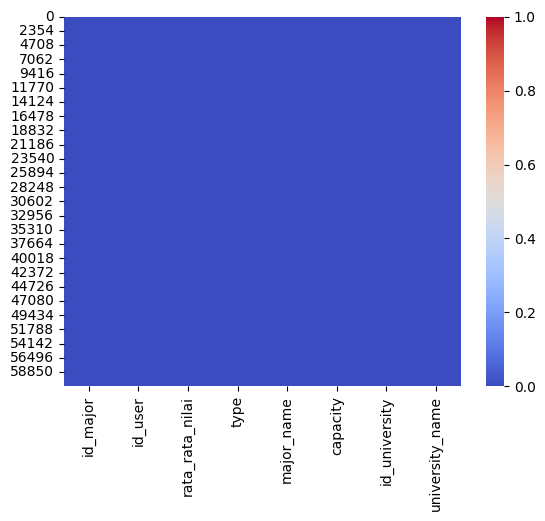

In [23]:
sns.heatmap(merged_data_clean.isna(), cmap='coolwarm')

<Axes: >

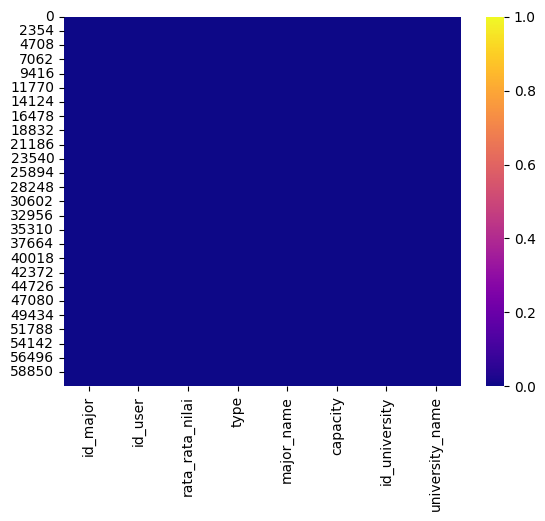

In [24]:
sns.heatmap(merged_data_clean.isna(), cmap='plasma')

In [25]:
# Membersihkan missing value dengan fungsi dropna()
merged_data_clean = merged_data_clean.dropna()
merged_data_clean.head()

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
0,3322014,26,610.333333,humanities,FAKULTAS SENIRUPA DAN DESAIN (FSRD),100.0,332.0,INSTITUT TEKNOLOGI BANDUNG
1,3212057,35,660.555556,humanities,ILMU KOMUNIKASI,40.0,321.0,UNIVERSITAS INDONESIA
2,3722057,44,482.777778,humanities,MANAJEMEN,112.0,372.0,UNIVERSITAS BRAWIJAYA
3,3212081,55,595.111111,humanities,KRIMINOLOGI,24.0,321.0,UNIVERSITAS INDONESIA
4,3812106,171,645.111111,humanities,AKUNTANSI,100.0,381.0,UNIVERSITAS AIRLANGGA


In [26]:
# mengecek ulang missing value
merged_data_clean.isnull().sum()

,0
id_major,0
id_user,0
rata_rata_nilai,0
type,0
major_name,0
capacity,0
id_university,0
university_name,0


# 7. Penanganan Kolom Duplikat
Pengecekan dan penghapusan kolom duplikat dilakukan untuk memastikan tidak ada data yang berulang, sehingga analisis menjadi lebih akurat dan efisien tanpa adanya informasi yang berlebihan atau redundan.

In [27]:
# cek duplikat
preparation = merged_data_clean
preparation.sort_values('id_major')

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
11503,1112017,83104,495.222222,humanities,EKONOMI PEMBANGUNAN,64.0,111.0,UNIVERSITAS SYIAH KUALA
55999,1112017,306921,462.555556,humanities,EKONOMI PEMBANGUNAN,64.0,111.0,UNIVERSITAS SYIAH KUALA
39198,1112017,234994,471.333333,humanities,EKONOMI PEMBANGUNAN,64.0,111.0,UNIVERSITAS SYIAH KUALA
37231,1112017,226049,479.555556,humanities,EKONOMI PEMBANGUNAN,64.0,111.0,UNIVERSITAS SYIAH KUALA
58696,1112017,317643,493.666667,humanities,EKONOMI PEMBANGUNAN,64.0,111.0,UNIVERSITAS SYIAH KUALA
...,...,...,...,...,...,...,...,...
43880,9212073,256141,543.000000,humanities,PENDIDIKAN BAHASA INGGRIS,16.0,921.0,UNIVERSITAS PAPUA
59087,9212073,319247,506.000000,humanities,PENDIDIKAN BAHASA INGGRIS,16.0,921.0,UNIVERSITAS PAPUA
34066,9212073,212888,458.111111,humanities,PENDIDIKAN BAHASA INGGRIS,16.0,921.0,UNIVERSITAS PAPUA
29111,9212073,190671,554.444444,humanities,PENDIDIKAN BAHASA INGGRIS,16.0,921.0,UNIVERSITAS PAPUA


In [28]:
# Membuang data duplikat pada variabel preparation
p = preparation.drop_duplicates('id_major')
p

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
0,3322014,26,610.333333,humanities,FAKULTAS SENIRUPA DAN DESAIN (FSRD),100.0,332.0,INSTITUT TEKNOLOGI BANDUNG
1,3212057,35,660.555556,humanities,ILMU KOMUNIKASI,40.0,321.0,UNIVERSITAS INDONESIA
2,3722057,44,482.777778,humanities,MANAJEMEN,112.0,372.0,UNIVERSITAS BRAWIJAYA
3,3212081,55,595.111111,humanities,KRIMINOLOGI,24.0,321.0,UNIVERSITAS INDONESIA
4,3812106,171,645.111111,humanities,AKUNTANSI,100.0,381.0,UNIVERSITAS AIRLANGGA
...,...,...,...,...,...,...,...,...
60743,9112211,326297,461.222222,humanities,MANAJEMEN ADMINISTRASI PERKANTORAN,18.0,911.0,UNIVERSITAS CENDERAWASIH
60803,7312132,326587,467.888889,humanities,EKONOMI PEMBANGUNAN,100.0,731.0,UNIVERSITAS TADULAKO
60817,1112064,326646,446.666667,humanities,PENDIDIKAN SEJARAH,36.0,111.0,UNIVERSITAS SYIAH KUALA
60931,1162083,327136,482.888889,humanities,ILMU ADMINISTRASI NEGARA,48.0,116.0,UNIVERSITAS ISLAM NEGERI AR-RANIRY


# Data Preparation - Content Based Filtering

# 1. Konversi Data Series Menjadi List
proses selanjutnya adalah melakukan konversi kolom id_major, university_name, dan major_name dari format Series menjadi list untuk memudahkan proses pengolahan data selanjutnya. Selanjutnya, dilakukan pengecekan panjang list untuk memastikan data sudah lengkap

In [29]:
# Mengonversi data series id_major menjadi dalam bentuk list
id_major = p['id_major'].tolist()
# Mengonversi data series university_name menjadi dalam bentuk list
nama_Univ = p['university_name'].tolist()
# Mengonversi data series major_name menjadi dalam bentuk list
nama_Prodi = p['major_name'].tolist()

print(len(id_major))
print(len(nama_Univ))
print(len(nama_Prodi))

1286
1286
1286


**Insight**

Hasil output menunjukkan bahwa ketiga list memiliki panjang yang sama, yaitu 1.286 elemen, yang menunjukkan kesesuaian struktur data dan tidak adanya kehilangan data selama proses konversi. Data dalam format list ini siap digunakan untuk proses selanjutnya, seperti pembuatan rekomendasi jurusan atau visualisasi berbasis array.

# 2. Membuat Dictionary
proses selanjutnya adalah Membuat DataFrame baru yang berisi kolom id_major, university_name, dan major_name dari list yang telah dikonversi sebelumnya untuk memudahkan pengelolaan dan analisis data.

In [30]:
# Membuat dictionary untuk data id_major, nama_Univ, dan nama_Prodi
id_new = pd.DataFrame({
    'id_major': id_major,
    'university_name': nama_Univ,
    'major_name': nama_Prodi

})
id_new

,id_major,university_name,major_name
0,3322014,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD)
1,3212057,UNIVERSITAS INDONESIA,ILMU KOMUNIKASI
2,3722057,UNIVERSITAS BRAWIJAYA,MANAJEMEN
3,3212081,UNIVERSITAS INDONESIA,KRIMINOLOGI
4,3812106,UNIVERSITAS AIRLANGGA,AKUNTANSI
...,...,...,...
1281,9112211,UNIVERSITAS CENDERAWASIH,MANAJEMEN ADMINISTRASI PERKANTORAN
1282,7312132,UNIVERSITAS TADULAKO,EKONOMI PEMBANGUNAN
1283,1112064,UNIVERSITAS SYIAH KUALA,PENDIDIKAN SEJARAH
1284,1162083,UNIVERSITAS ISLAM NEGERI AR-RANIRY,ILMU ADMINISTRASI NEGARA


In [31]:
# mengecek dataframe final
data = id_new
data.sample(5)

,id_major,university_name,major_name
704,3862013,UNIVERSITAS ISLAM NEGERI SUNAN AMPEL SURABAYA,PENDIDIKAN BAHASA INGGRIS
1224,7132424,UNIVERSITAS ISLAM NEGERI ALAUDDIN,HUBUNGAN INTERNASIONAL
652,7122302,UNIVERSITAS NEGERI MAKASSAR,ADMINISTRASI NEGARA
462,3342274,UNIVERSITAS PENDIDIKAN INDONESIA,PENDIDIKAN TATA BOGA
432,3812064,UNIVERSITAS AIRLANGGA,ILMU HUBUNGAN INTERNASIONAL


# 3. TF-IDF Vectorizer
Metode evaluasi ini, yang disebut TF-IDF (Term Frequency-Inverse Document Frequency), digunakan untuk mengukur pentingnya suatu kata dibandingkan dengan kata-kata lain dalam sebuah dokumen. Secara matematis, TF-IDF terdiri dari dua komponen utama: TF (Term Frequency) yang menunjukkan frekuensi kemunculan suatu kata dalam sebuah teks, dan IDF (Inverse Document Frequency) yang menunjukkan seberapa jarang atau umumnya kata tersebut muncul di seluruh kumpulan dokumen.

In [32]:
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan perhitungan idf pada data major_name
tfidf_vectorizer.fit(data['major_name'])

# Mapping array dari fitur index integer ke fitur nama
tfidf_vectorizer.get_feature_names_out()

array(['adm', 'admin', 'administrasi', 'adminstrasi', 'agama',
       'akuntansi', 'akutansi', 'anak', 'antropologi', 'arab',
       'arkeologi', 'asia', 'bahasa', 'bali', 'banyuwangi', 'barat',
       'batak', 'belanda', 'bhs', 'biasa', 'bilingual', 'bimb',
       'bimbingan', 'bisnis', 'boga', 'bondowoso', 'bone', 'budaya',
       'bugis', 'bumi', 'busana', 'cibiru', 'cina', 'cirebon', 'daerah',
       'dan', 'dasar', 'desain', 'destinasi', 'digital', 'dini', 'disain',
       'dkv', 'drama', 'ekonomi', 'etno', 'etnomusikologi', 'fakultas',
       'fashion', 'film', 'filsafat', 'fiskal', 'fotografi', 'fsrd',
       'gbr', 'geografi', 'grafis', 'grfs', 'guru', 'hubungan', 'hukum',
       'humas', 'iesp', 'ih', 'iks', 'il', 'ilmu', 'ind', 'indo',
       'indoneia', 'indonesia', 'industri', 'informasi', 'inggris',
       'interior', 'internas', 'internasional', 'ip', 'ips', 'islam',
       'jasmani', 'jawa', 'jepang', 'jerman', 'jurnalistik', 'kamp',
       'kampus', 'karawitan', 'kateri

In [33]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['major_name'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1286, 230)

kemudian melakukan pelatihan dan transformasi data teks pada kolom major_name menggunakan TfidfVectorizer sehingga menghasilkan matriks TF-IDF. Kemudian, ukuran matriks tersebut diperiksa untuk mengetahui jumlah dokumen dan fitur yang dihasilkan

In [34]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.60243194, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [35]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=data.id_major
).sample(22, axis=1).sample(10, axis=0)

,negara,jerman,ips,konseling,tasikmalaya,fakultas,sastra,studi,arab,musik,...,si,manajemen,resort,pedalangan,grfs,bhs,sosial,sek,jepang,ih
id_major,,,,,,,,,,,,,,,,,,,,,
3242087,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1422336,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3632035,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6112064,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1912034,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3812161,0.0,0.0,0.0,0.0,0.0,0.0,0.543924,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.839134,0.0
1612104,0.0,0.0,0.0,0.0,0.0,0.0,0.434200,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3512142,0.0,0.0,0.0,0.0,0.0,0.0,0.434200,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1122082,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Data Preparation - Collaborative Filtering

# Data Preparation

In [36]:
# Membaca dataset
df = p
df

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
0,3322014,26,610.333333,humanities,FAKULTAS SENIRUPA DAN DESAIN (FSRD),100.0,332.0,INSTITUT TEKNOLOGI BANDUNG
1,3212057,35,660.555556,humanities,ILMU KOMUNIKASI,40.0,321.0,UNIVERSITAS INDONESIA
2,3722057,44,482.777778,humanities,MANAJEMEN,112.0,372.0,UNIVERSITAS BRAWIJAYA
3,3212081,55,595.111111,humanities,KRIMINOLOGI,24.0,321.0,UNIVERSITAS INDONESIA
4,3812106,171,645.111111,humanities,AKUNTANSI,100.0,381.0,UNIVERSITAS AIRLANGGA
...,...,...,...,...,...,...,...,...
60743,9112211,326297,461.222222,humanities,MANAJEMEN ADMINISTRASI PERKANTORAN,18.0,911.0,UNIVERSITAS CENDERAWASIH
60803,7312132,326587,467.888889,humanities,EKONOMI PEMBANGUNAN,100.0,731.0,UNIVERSITAS TADULAKO
60817,1112064,326646,446.666667,humanities,PENDIDIKAN SEJARAH,36.0,111.0,UNIVERSITAS SYIAH KUALA
60931,1162083,327136,482.888889,humanities,ILMU ADMINISTRASI NEGARA,48.0,116.0,UNIVERSITAS ISLAM NEGERI AR-RANIRY


# 1. Encode
proses selanjutnya adalah mengubah userID menjadi angka yang berurutan agar lebih mudah saat akan digunakan

In [37]:
# Mengubah userID menjadi list tanpa nilai yang sama
id_peserta = df['id_user'].unique().tolist()
print('list userID: ', id_peserta)

# Melakukan encoding id_peserta
user_to_user_encoded = {x: i for i, x in enumerate(id_peserta)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke id_univ
user_encoded_to_user = {i: x for i, x in enumerate(id_peserta)}
print('encoded angka ke userID: ',user_encoded_to_user)

list userID:  [26, 35, 44, 55, 171, 173, 184, 213, 215, 234, 240, 246, 249, 257, 258, 261, 263, 267, 274, 275, 276, 293, 305, 306, 311, 313, 314, 318, 332, 334, 346, 357, 366, 367, 370, 374, 380, 381, 403, 404, 410, 411, 414, 416, 427, 429, 435, 453, 454, 464, 466, 494, 513, 515, 525, 527, 542, 547, 550, 551, 557, 571, 574, 592, 605, 611, 613, 620, 623, 625, 630, 638, 639, 643, 644, 645, 655, 669, 679, 686, 704, 706, 769, 770, 773, 788, 790, 794, 800, 807, 831, 832, 860, 867, 869, 932, 934, 936, 940, 943, 988, 994, 998, 1033, 1037, 1039, 1041, 1072, 1109, 1112, 1114, 1117, 1122, 1136, 1153, 1173, 1188, 1192, 1210, 1236, 1273, 1284, 1288, 1321, 1329, 1338, 1339, 1343, 1344, 1359, 1402, 1410, 1412, 1413, 1415, 1420, 1426, 1437, 1471, 1499, 1554, 1563, 1567, 1571, 1576, 1577, 1591, 1600, 1614, 1625, 1648, 1677, 1688, 1705, 1714, 1715, 1735, 1752, 1772, 1828, 1842, 1847, 1848, 1870, 1877, 1941, 1955, 1965, 1970, 1971, 1975, 1981, 2000, 2081, 2091, 2125, 2126, 2130, 2151, 2172, 2180, 2183, 

In [38]:
# Mengubah userID menjadi list tanpa nilai yang sama
code_prodi = df['id_major'].unique().tolist()
print('list userID: ', code_prodi)

# Melakukan encoding code_prodi
prodi_to_prodi_encoded = {x: i for i, x in enumerate(code_prodi)}
print('encoded userID : ', prodi_to_prodi_encoded)

# Melakukan proses encoding angka ke ke code_prodi
prodi_encoded_to_prodi = {i: x for i, x in enumerate(code_prodi)}
print('encoded angka ke userID: ', prodi_encoded_to_prodi)

list userID:  [3322014, 3212057, 3722057, 3212081, 3812106, 1422104, 3232247, 3622095, 3222021, 3342057, 3212011, 3612031, 3332047, 3332256, 3612224, 3232305, 3222431, 3622025, 1712105, 3332191, 3322022, 3332202, 3332063, 3612046, 3632027, 3632035, 3552093, 3232151, 3632012, 7112072, 3232417, 3242025, 3242017, 3832304, 3332287, 3562192, 3532057, 3532096, 1912073, 3652272, 3512014, 3342355, 3562122, 1912115, 1212235, 7112161, 3732044, 1312116, 3732067, 3732156, 3532107, 3722065, 3812017, 3722123, 3712016, 6112064, 3722081, 3652032, 6112072, 3342394, 6112184, 3562056, 3612197, 3242056, 5312043, 3522086, 3812095, 3562145, 3332322, 3842071, 3732013, 3332233, 3612085, 3332086, 3612182, 3342502, 3232294, 6112056, 3552166, 3342065, 3572205, 3822012, 3532162, 3612216, 3232062, 3312027, 3342452, 3332071, 3612015, 3532316, 3362077, 3222141, 1112087, 3232077, 3622072, 3112056, 3342146, 3112017, 3212162, 3532042, 3722026, 1712055, 3342026, 3732292, 1422062, 3222102, 5412091, 3112033, 3342371, 3212

# 2. Mapping Features
Pada tahap ini, nilai-nilai asli pada kolom id_user dan id_major dalam DataFrame df diubah menjadi bentuk numerik (encoded). Proses ini bertujuan untuk mempermudah pemrosesan data pada tahapan analisis dan pemodelan selanjutnya, terutama ketika digunakan dalam algoritma machine learning yang memerlukan input dalam format numerik.

In [39]:
# Mapping user ke dataframe id_user
df['user'] = df['id_user'].map(user_to_user_encoded)
# Mapping prodi ke dataframe id_major
df['prodi'] = df['id_major'].map(prodi_to_prodi_encoded)

<ipython-input-39-305d5d6d4918>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['id_user'].map(user_to_user_encoded)
<ipython-input-39-305d5d6d4918>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prodi'] = df['id_major'].map(prodi_to_prodi_encoded)


In [40]:
# Mendapatkan jumlah iser
num_user = len(user_to_user_encoded)
print(num_user)

# Mendapatkan jumlah prodi
num_prodi = len(prodi_encoded_to_prodi)
print(num_prodi)

# Nilai minimum hasil rata-rata nilai tes mahasiswa
min_nilai_mah = min(df['rata_rata_nilai'])

# Nilai maksimal hasil rata-rata nilai tes mahasiswa
max_nilai_mah = max(df['rata_rata_nilai'])

print('Number of user: {}, Number of prodi: {}, Min nilai hasil rata-rata tes: {}, Max nilai hasil rata-rata tes : {}'.format(
    num_user, num_prodi, min_nilai_mah, max_nilai_mah
))

1286
1286
Number of user: 1286, Number of prodi: 1286, Min nilai hasil rata-rata tes: 346.3333333333333, Max nilai hasil rata-rata tes : 691.6666666666666


# 3. Membagi Data untuk Training dan Validasi
Data pada dataframe df diacak terlebih dahulu, kemudian dipisahkan menjadi dua bagian: fitur (x), yang terdiri dari kolom 'user' dan 'prodi', serta target (y), yaitu kolom 'rata_rata_nilai'. Selanjutnya, nilai pada kolom 'rata_rata_nilai' dinormalisasi ke dalam rentang 0 hingga 1 agar lebih sesuai untuk pelatihan model. Setelah itu, data dibagi menjadi dua subset, yakni 80% untuk data pelatihan dan 20% untuk data validasi yang akan digunakan dalam proses training model.

In [41]:
df = df.sample(frac=1, random_state=42)
df

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name,user,prodi
51518,7222237,289294,462.111111,humanities,PGSD,128.0,722.0,UNIVERSITAS NEGERI MANADO,1246,1246
553,6212042,4888,513.222222,humanities,ILMU HUKUM,300.0,621.0,UNIVERSITAS MATARAM,333,333
12235,6112176,86881,505.111111,humanities,SOSIOLOGI,35.0,611.0,UNIVERSITAS UDAYANA,937,937
775,3732222,7697,521.888889,humanities,PSIKOLOGI,100.0,373.0,UNIVERSITAS NEGERI MALANG,413,413
44751,8112184,259086,491.333333,humanities,PGSD S1,50.0,811.0,UNIVERSITAS PATTIMURA,1206,1206
...,...,...,...,...,...,...,...,...,...,...
22650,5312186,152268,564.888889,humanities,PENDIDIKAN JASMANI KESEHATAN DAN REKREASI,68.0,531.0,UNIVERSITAS LAMBUNG MANGKURAT,1044,1044
27240,7122213,180333,473.555556,humanities,PENDIDIKAN SEJARAH,32.0,712.0,UNIVERSITAS NEGERI MAKASSAR,1095,1095
29543,7312043,193697,496.333333,humanities,PEND. SEJARAH,50.0,731.0,UNIVERSITAS TADULAKO,1130,1130
7291,1422216,54648,510.222222,humanities,MANAJEMEN (NK),64.0,142.0,UNIVERSITAS NEGERI PADANG,860,860


In [42]:
x = df[['user', 'prodi']].values

y = df['rata_rata_nilai'].apply(lambda x: (x - min_nilai_mah) / (max_nilai_mah - min_nilai_mah)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[1246 1246]
 [ 333  333]
 [ 937  937]
 ...
 [1130 1130]
 [ 860  860]
 [1126 1126]] [0.33526384 0.48326898 0.45978121 ... 0.43436293 0.47458172 0.12548263]


# Model Development | Content Based Filtering

# Cosine Similarity
Tujuan dari tahap Kesamaan cosinus adalah mengukur kesamaan antara dua vektor dan menentukan apakah mereka mengarah ke arah yang sama. Tahap kesamaan kosinus penting dalam model content-based filtering karena memberikan cara yang efektif untuk mengukur kesamaan antara dua vektor yang mewakili item-item dengan menghitung sudut kosinusnya.

In [43]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.21577609,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.21577609, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [44]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['id_major'], columns=data['id_major'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1286, 1286)


id_major,3652241,1222245,3732284,1222052,3642092
id_major,,,,,
3612201,0.0,0.000000,0.0,0.00000,0.0
3732187,0.0,0.091065,0.0,0.00000,0.0
1222195,0.0,0.070052,0.0,0.00000,0.0
7512215,0.0,0.000000,0.0,0.00000,0.0
6312205,0.0,0.000000,0.0,0.00000,0.0
1222141,0.0,0.094634,0.0,0.00000,0.0
3562242,0.0,0.089345,0.0,0.00000,0.0
1142016,0.0,0.000000,0.0,0.00000,0.0
3342204,0.0,0.092266,0.0,0.00000,0.0


**Insight**

Dari hasil perhitungan cosine similarity, diperoleh pemahaman mengenai tingkat kemiripan antar program studi berdasarkan representasi fitur mereka. Hal ini memungkinkan sistem untuk merekomendasikan jurusan lain yang memiliki karakteristik serupa, meskipun belum pernah dipilih oleh pengguna sebelumnya. Pendekatan ini efektif untuk mengatasi masalah cold start dan memperkaya sistem rekomendasi berbasis konten.

# Top-N Rekomendasi
Membuat sebuah fungsi yang akan menghasilkan dataframe berisi 5 jurusan teratas sebagai hasil rekomendasi.

In [45]:
def major_recommendations(id_major, similarity_data=cosine_sim_df, items=data[['id_major', 'university_name', 'major_name']], k=5):

    index = similarity_data.loc[:,id_major].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(id_major, errors='ignore')


    recomen = pd.DataFrame(closest).merge(items).head(k)
    return recomen

In [46]:
data[data.id_major.eq(3612135)]

,id_major,university_name,major_name
669,3612135,UNIVERSITAS GADJAH MADA,SASTRA PRANCIS


In [47]:
data[data.id_major.eq(7112114)]

,id_major,university_name,major_name
684,7112114,UNIVERSITAS HASANUDDIN,ILMU HUBUNGAN INTERNASIONAL


Setelah itu, dilakukan pencarian untuk menampilkan semua data yang memiliki id_major 7112114

In [48]:
major_recommendations(3612135)

,id_major,university_name,major_name
0,3562281,UNIVERSITAS NEGERI SEMARANG,SASTRA PRANCIS
1,3232135,UNIVERSITAS NEGERI JAKARTA,PENDIDIKAN BAHASA PRANCIS
2,3562242,UNIVERSITAS NEGERI SEMARANG,PENDIDIKAN BAHASA PRANCIS
3,3622296,UNIVERSITAS NEGERI YOGYAKARTA,PENDIDIKAN BAHASA PRANCIS
4,3332144,UNIVERSITAS PADJADJARAN,SASTRA INGGRIS


In [49]:
major_recommendations(7112114)

,id_major,university_name,major_name
0,1332094,UNIVERSITAS MARITIM RAJA ALI HAJI,ILMU HUBUNGAN INTERNASIONAL
1,5412075,UNIVERSITAS MULAWARMAN,ILMU HUBUNGAN INTERNASIONAL
2,1712183,UNIVERSITAS SRIWIJAYA,ILMU HUBUNGAN INTERNASIONAL
3,1412141,UNIVERSITAS ANDALAS,ILMU HUBUNGAN INTERNASIONAL
4,3212177,UNIVERSITAS INDONESIA,ILMU HUBUNGAN INTERNASIONAL


langkah selanjutnya adalah memberikan rekomendasi jurusan (major) yang mirip atau terkait dengan jurusan yang memiliki id_major 7112114 berdasarkan kemiripan isi jurusan (cosine similarity).

In [50]:
def precision_at_k(recommended_ids, relevant_ids, k):
    recommended_at_k = recommended_ids[:k]
    relevant_recommended = [id_ for id_ in recommended_at_k if id_ in relevant_ids]
    precision = len(relevant_recommended) / k
    return precision

relevant_ids = [3562281, 3232135, 3562242, 3622296]
recommended_ids = [3562281, 3232135, 3562242, 3622296, 3332144]

precision = precision_at_k(recommended_ids, relevant_ids, k=5)
print("Precision:", precision)

Precision: 0.8


# Model Development | Collaborative Filtering

# 1. Generate Class RecommenderNet
Pada tahap ini, kelas RecommenderNetakan didefinisikan sebagai model neural network untuk sistem rekomendasi.

In [51]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_user, num_prodi, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_user = num_user
    self.num_prodi = num_prodi
    self.embedding_size = embedding_size
    self.user_embeddings = layers.Embedding( # layer embedding user
        num_user,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_user, 1) # layer embedding user bias
    self.prodi_embedding = layers.Embedding( # layer embeddings books
        num_prodi,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.prodi_bias = layers.Embedding(num_prodi, 1) # layer embedding books bias

  def call(self, inputs):
    user_vector = self.user_embeddings(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    prodi_vector = self.prodi_embedding(inputs[:, 1]) # memanggil layer embedding 3
    prodi_bias = self.prodi_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_prodi = tf.tensordot(user_vector, prodi_vector, 2)

    x = dot_user_prodi+ user_bias + prodi_bias

    return tf.nn.sigmoid(x) # activation sigmoid

# 2. Compile Model
Model RecommenderNet yang telah dirancang sebelumnya diinisialisasi dengan parameter berupa jumlah pengguna (num_user), jumlah program studi (num_prodi), serta ukuran embedding sebesar 50. Setelah itu, model dikompilasi dengan menggunakan fungsi kerugian BinaryCrossentropy, optimizer Adam, dan metrik evaluasi Root Mean Squared Error (RMSE). Dengan konfigurasi tersebut, model siap untuk menjalani proses pelatihan menggunakan data yang tersedia.

In [52]:
# Compile model
model = RecommenderNet(num_user, num_prodi, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# 3. Callbacks
Melakukan penerapan fungsi callbacks berupa ReduceLROnPlateau() dan EarlyStopping() guna meningkatkan efektivitas serta efisiensi dalam proses pelatihan model.

In [53]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1.5e-5
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

# 4. Training Model
Pada tahap ini, dilakukan pelatihan model jaringan saraf (neural network) dengan menggunakan metode fit() pada objek model yang sudah melalui proses kompilasi sebelumnya.

In [54]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [reduce_lr, early_stop]
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.6935 - root_mean_squared_error: 0.1534 - val_loss: 0.6938 - val_root_mean_squared_error: 0.1491 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7258 - root_mean_squared_error: 0.1972 - val_loss: 0.6937 - val_root_mean_squared_error: 0.1488 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7017 - root_mean_squared_error: 0.1635 - val_loss: 0.6936 - val_root_mean_squared_error: 0.1486 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6936 - root_mean_squared_error: 0.1498 - val_loss: 0.6934 - val_root_mean_squared_error: 0.1484 - learning_rate: 0.0010
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6930 - root_mean_squared_error: 0.1516 - val_loss: 0.6933 - val_root_mean_squared_error: 0.1482 - learning_rate: 0.0010
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6910 - root_mean_squared_error: 0

# 5. Top-N Recommendation
Proses ini dimulai dengan pengambilan sampel data secara acak untuk mengenali program studi (prodi) yang sudah dipilih oleh pengguna. Selanjutnya, prodi yang belum dipilih disaring agar hanya yang relevan dan terdaftar dalam kamus encoding yang dipertimbangkan. Kemudian, model melakukan prediksi skor untuk setiap kombinasi pengguna dan prodi yang belum dipilih, dan 10 prodi dengan skor tertinggi dipilih sebagai rekomendasi. Rekomendasi ini ditampilkan bersama dengan daftar prodi yang sudah dipilih oleh pengguna sebagai konteks tambahan.

Selanjutnya, model collaborative filtering yang sebelumnya telah dilatih digunakan untuk memprediksi skor pada prodi yang belum dipilih oleh pengguna. Dari hasil prediksi tersebut, 10 prodi dengan skor tertinggi diambil sebagai rekomendasi. Daftar rekomendasi ini disajikan bersama dengan prodi yang telah dipilih sebelumnya, lengkap dengan nama universitas masing-masing, untuk memberikan gambaran yang lebih jelas dan membantu pengguna dalam membuat keputusan yang tepat.

In [55]:
# Mengambil sample user
user_id = df['id_user'].sample(1).iloc[0]
prodi_pick_by_user = df[df['id_user'] == user_id]
prodi_pick_by_user

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name,user,prodi
44681,7412013,258842,445.888889,humanities,MANAJEMEN,120.0,741.0,UNIVERSITAS SULAWESI BARAT,1205,1205


In [56]:
prodi_not_pick = df[~df['id_major'].isin(prodi_pick_by_user['id_major'].values)]['id_major']
prodi_not_pick = list(
    set(prodi_not_pick)
    .intersection(set(prodi_to_prodi_encoded.keys()))
)
prodi_not_pick

[3842055,
 1712136,
 3342347,
 7512076,
 3842063,
 1712144,
 3342355,
 7512084,
 3842071,
 1712152,
 3342363,
 3342371,
 3842086,
 1712167,
 7512103,
 3842094,
 7512111,
 1712175,
 3342386,
 1712183,
 3842105,
 3342394,
 7512126,
 3842113,
 3342405,
 3842121,
 3342413,
 7512142,
 3342421,
 3842136,
 7512157,
 3342436,
 3342444,
 3342452,
 7512181,
 3342467,
 3342475,
 3342483,
 7512215,
 3342491,
 7512223,
 3342502,
 7512231,
 3342517,
 3342525,
 3342533,
 3342541,
 5112017,
 5112025,
 3342556,
 7512285,
 5112033,
 3342564,
 5112041,
 3342572,
 5112056,
 3342587,
 5112064,
 5112072,
 7512335,
 5112087,
 5112095,
 5112114,
 5112145,
 5112153,
 5112161,
 5112176,
 5112184,
 5112192,
 5112203,
 5112211,
 5112226,
 5112234,
 5112242,
 5112257,
 5112273,
 5112281,
 3572194,
 5112296,
 3572205,
 5112307,
 3572213,
 3572221,
 3572236,
 3212011,
 3212026,
 3212034,
 3212042,
 6112017,
 6112025,
 3212057,
 6112033,
 3212065,
 3212073,
 6112041,
 3212081,
 6112056,
 6112064,
 3212096,
 6112072,


In [57]:
prodi_not_pick = [[prodi_to_prodi_encoded.get(x)] for x in prodi_not_pick]
user_encoder = user_to_user_encoded.get(user_id)
user_prodi_array = np.hstack(
    ([[user_encoder]] * len(prodi_not_pick), prodi_not_pick)
)

user_prodi_array

array([[1205,  400],
       [1205,  541],
       [1205,  217],
       ...,
       [1205,  328],
       [1205,  803],
       [1205,  735]])

In [58]:
ratings_model = model.predict(user_prodi_array).flatten()

top_ratings_indices = ratings_model.argsort()[-10:][::-1]

recommended_prodi_ids = [
    prodi_encoded_to_prodi.get(prodi_not_pick[x][0]) for x in top_ratings_indices
]
print('Memperlihatkan rekomendasi untuk users: {}'.format(user_id))
print('===' * 9)
print('Prodi berdasarkan input user')
print('----' * 8)

top_prodi_user = (
    prodi_pick_by_user.sort_values(
        by = 'rata_rata_nilai',
        ascending=False
    ).head().id_major.values
)

prodi_df_rows = df[df['id_major'].isin(top_prodi_user)]
for row in prodi_df_rows.itertuples():
    print(row.major_name, ':', row.university_name)

print('----' * 8)
print('Top 10 univ rekomendasi untuk user')
print('----' * 8)

recommended_univ = df[df['id_major'].isin(recommended_prodi_ids)]
for row in recommended_univ.itertuples():
    print(row.major_name, ':', row.university_name)
recommended_univ

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Memperlihatkan rekomendasi untuk users: 258842
Prodi berdasarkan input user
--------------------------------
MANAJEMEN  : UNIVERSITAS SULAWESI BARAT
--------------------------------
Top 10 univ rekomendasi untuk user
--------------------------------
ILMU ADMINISTRASI NEGARA : UNIVERSITAS CENDERAWASIH
ILMU HUKUM : UNIVERSITAS CENDERAWASIH
SASTRA INDONESIA : UNIVERSITAS DIPONEGORO
AKUNTANSI : UNIVERSITAS SINGAPERBANGSA KARAWANG
BAHASA DAN SASTRA INGGRIS  : UNIVERSITAS NEGERI MALANG
PENDIDIKAN SEJARAH : UNIVERSITAS SEBELAS MARET
PSIKOLOGI : UNIVERSITAS NEGERI PADANG
SENI RUPA MURNI : ISI YOGYAKARTA
DESAIN INTERIOR : ISI YOGYAKARTA
ILMU HUKUM : UNIVERSITAS ISLAM NEGERI JAKARTA


,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name,user,prodi
19280,9112025,129964,584.111111,humanities,ILMU ADMINISTRASI NEGARA,18.0,911.0,UNIVERSITAS CENDERAWASIH,1007,1007
15603,9112041,107461,552.333333,humanities,ILMU HUKUM,65.0,911.0,UNIVERSITAS CENDERAWASIH,966,966
462,3552015,4204,555.777778,humanities,SASTRA INDONESIA,60.0,355.0,UNIVERSITAS DIPONEGORO,286,286
416,3312035,3872,556.444444,humanities,AKUNTANSI,111.0,331.0,UNIVERSITAS SINGAPERBANGSA KARAWANG,266,266
517,3732245,4605,588.000000,humanities,BAHASA DAN SASTRA INGGRIS,30.0,373.0,UNIVERSITAS NEGERI MALANG,319,319
84,3532162,769,571.777778,humanities,PENDIDIKAN SEJARAH,40.0,353.0,UNIVERSITAS SEBELAS MARET,82,82
111,1422062,1037,569.444444,humanities,PSIKOLOGI,120.0,142.0,UNIVERSITAS NEGERI PADANG,104,104
5754,3642076,45028,594.777778,humanities,SENI RUPA MURNI,45.0,364.0,ISI YOGYAKARTA,812,812
1055,3642092,10558,576.222222,humanities,DESAIN INTERIOR,41.0,364.0,ISI YOGYAKARTA,473,473
112,3222102,1039,588.444444,humanities,ILMU HUKUM,48.0,322.0,UNIVERSITAS ISLAM NEGERI JAKARTA,105,105


# 6. Visualisasi Metrik

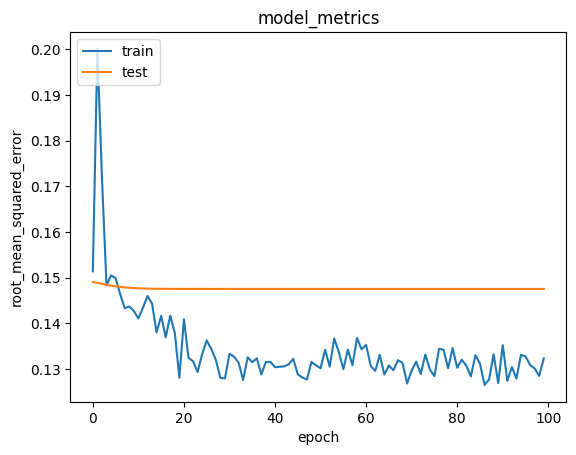

In [59]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()